In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import konlpy
from nltk import download
import nltk
from nltk.tokenize import RegexpTokenizer
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
import itertools

In [21]:
df = pd.read_excel('./원본데이터/0105_0112.xlsx')
df

,내용
0,최신 헨리여권지수에 따르면 일본이 193개국에 무비자 입국을 허용하면서 세계에서 가...
1,"팝 음악에서 수상에 빛나는 드라마와 영화(기생충, 오징어 게임 등)에 이르기까지, ..."
2,"꿈꾸는 밤 외출이 그릴에서 갓 구워낸 고기와 김치 반찬, 노래방인가?\n \n 코리..."
3,오스카상 후보에 올랐던 고레에다 히로카즈 감독의 2018년작 <어느 가족>은 거짓말...
4,세계의 많은 사람들이 방탄소년단과 블랙핑크와 같은 슈퍼스타의 팝 음악 퍼포먼스를 통...
...,...
96,코로나19 여파로 2년여간 중단됐던 얼음낚시축제가 올해 화천에서 열린다. 23일간 ...
97,한국 남자 하키 주장 이남용은 팀이 경험이 많고 2023 부바네스와르-루르켈라 FI...
98,한국의 김톰(김주형)은 1라운드 65타에 4언더파 69타를 추가해 12언더파가 됐고...
99,대립되는 요소들의 조화로 구성된 나라인 한국은 우리를 놀라게 한다. 한국의 다이내믹...


In [22]:
# director_df = df[df['내용'].str.contains('게임')]
# director_df = director_df.reset_index(drop=True)

In [23]:
# w = list(director_df['내용'])
# for i in range(len(w)):
#     w[i] = str(w[i])
# content = ' '.join(w)
# content

### 한국어

In [5]:
from konlpy.tag import Komoran
kor_stopwords = ['한국', '한국의']

komoran = konlpy.tag.Komoran()
komoran = Komoran(userdic='user_dict.txt')

In [26]:
kor_total = []
for news in df['내용']:
    temp = []
    news = news.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','').replace('\t','').replace('\r','')
    pos_news = [t for t in komoran.nouns(news)]
    for i in range(len(pos_news)):
        if pos_news[i] not in kor_stopwords:
            temp.append(pos_news[i])
    kor_total.append(' '.join(temp))
print(kor_total)

['최신 헨리 여권 지수 일본 개국 비자 입국 허용 세계 여권 년 시작 일본 지수 년 연속 위 차지 여행 산업 코로나 유행 반등 사용 것 일본 외교부 입수 수 최신 수치 년 말 일본 국민 소지 유효 여권 장 전년도 대비 명 이상 감소 것 여권 인구 미만 의미 싱가포르 지수 공동 위 차지 독일 스페인 기타 유럽 국가 뒤 개 국가 무비 자로 여행 수 미국 스위스 뉴질랜드 노르웨이 위 중국 볼리비아 개 국가 무비 자로 여행 수 러시아 상황 개 국가 무비 자로 여행 수 아프가니스탄 개 국가 무비 자로 여행 수 것 런던 본사 이민 컨설팅 회사 헨리 앤드 발표 순위 국제항공운송협회 데이터 사용 개 목적지 접근 수 개 여권 접근 순위 방법 금융 자문 사이 자 아랍 엘 미 리트 선두 아톤 캐피털 발표 것 여권 지수 별개 7월 실시 모닝 컨설팅 여론 조사 일본의 성 응답자 여가 여행 계획 개국 비율 여행 계획 말 위 차지 일본 국제 관광 진흥 기구 작년 1월 10월 명 일본 국민 해외 여행 년 동안 명 달성 것 한참 글', '팝 음악 수상 드라마 영화 기생충 오징어 게임 등 엔터테인먼트 산업 국제무대 강타 박찬욱 감독 미스터리 로맨스 영화 헤어질 결심 성공 영화 목록 추가 박찬욱 감독 버라이어티 인터뷰 느와르 장르 길 영감 이유 폭력 작품 로맨스 서사 추가 결정 이유 말 현대 영화 최전선 박찬욱 감독 영화 면 탐구 인상 포트폴리오 자랑 올드보이 복수는 나의 것 친절한 금자씨 아가씨 비평가 찬사 호평 박찬욱 감독 최근작 헤어질 결심 네오 느와르 영화로 간주 박 감독 원래 길 설명 박찬욱 감독 말 느와르 장르 현대 표현 시작 게 느와르 장르 시작 너머 말 박찬욱 감독 자신 영화 로맨스 등장 작품 폭력 때문 관객 로맨스 간과 수 박찬욱 감독 헤어질 결심 단계 수위 선택 박찬욱 감독 영화 전 사랑 이야기 말 사람 라고 속 생각 베일 사람 이야기 안 로맨스 이야기 것 것 영화 사람 인식 지배 폭력 과도 노출 사람 안 로맨스 이야기 수 것 때문 말 헤어질 결심 남편 혐의 여성 조사 형사

### 영어

In [7]:
eng_stopwords = ['The', 'the', 'korean', 'Korean','korea','Korea','kore','Kore','top','TOP']
eng_total = []

# 3글자 이상
tokenizer = RegexpTokenizer("[\w']{3,}")

In [8]:
for news in df['내용']:
    temp = []
    news = news.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','')
    news = re.sub('[^a-zA-Z ]', '', news).strip()
    pos_news = [t for t in tokenizer.tokenize(news)]
    for i in range(len(pos_news)):
        if pos_news[i] not in eng_stopwords:
            temp.append(''.join(pos_news[i]))
    eng_total.append(' '.join(temp))

### 한국어 + 영어 합치기

In [9]:
total = []
for i in range(len(df)):
    temp = []
    temp.append(kor_total[i])
    temp.append(eng_total[i])
    total.append(' '.join(temp))

In [10]:
#TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(total)

In [11]:
tfidf_weights = [(word, tfidf.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
tfidf_weights[0:10]

[('최신', 0.4779042683108703),
 ('헨리', 0.3085385270793207),
 ('여권', 0.6609341226840313),
 ('지수', 1.1599315594504183),
 ('일본', 2.3579389262075345),
 ('개국', 0.4220190964333798),
 ('비자', 0.3307235692422809),
 ('입국', 0.3487533914179155),
 ('허용', 0.0992677827841725),
 ('세계', 2.183660299991135)]

In [12]:
df = pd.DataFrame(tfidf_weights, columns = ['word', 'tfidf'])
df = df.sort_values('tfidf', ascending=False)
df = df.reset_index(drop=True)
df

,word,tfidf
0,영화,3.420333
1,감독,3.051510
2,선수,2.880735
3,드라마,2.743908
4,넷플릭스,2.537794
...,...,...
5074,가와,0.016366
5075,브라이언,0.016366
5076,유해준,0.016366
5077,이일,0.016366


In [13]:
final = df.head(300)
final_dict = final.set_index('word').to_dict()['tfidf']
final_dict

{'영화': 3.4203332751746753,
 '감독': 3.051510166457372,
 '선수': 2.8807354851418037,
 '드라마': 2.743908182560905,
 '넷플릭스': 2.537793692160041,
 '일본': 2.3579389262075345,
 '세계': 2.183660299991135,
 '축제': 2.133324017512187,
 '방탄소년단': 2.1033528375622406,
 '사람': 2.0212065961932977,
 '블랙핑크': 1.9131522107509935,
 '그룹': 1.8799669187575678,
 '콘텐츠': 1.8356280995597802,
 '작품': 1.797648293596508,
 '음식': 1.7542714180060033,
 '필리핀': 1.7278753270461915,
 '자신': 1.645810966865847,
 '서울': 1.6038741448003857,
 '이야기': 1.6000514197126903,
 '1월': 1.5929491230070645,
 '시작': 1.5838980595234233,
 '인기': 1.5559099503411127,
 '한류': 1.5510264820743518,
 '문화': 1.437935093418405,
 '방문': 1.4198947550101706,
 '행사': 1.3885465112029338,
 '농구': 1.3834688571172715,
 '북한': 1.3697867542384046,
 '요리': 1.3689103614818885,
 '국가': 1.3597625637348683,
 '공연': 1.3556239043159248,
 '미국': 1.3132683065767554,
 '박찬욱': 1.3129321400696574,
 '태국': 1.3096058147370884,
 '관광객': 1.2942926368788867,
 '활동': 1.283286128997064,
 '코로나': 1.27872608944593

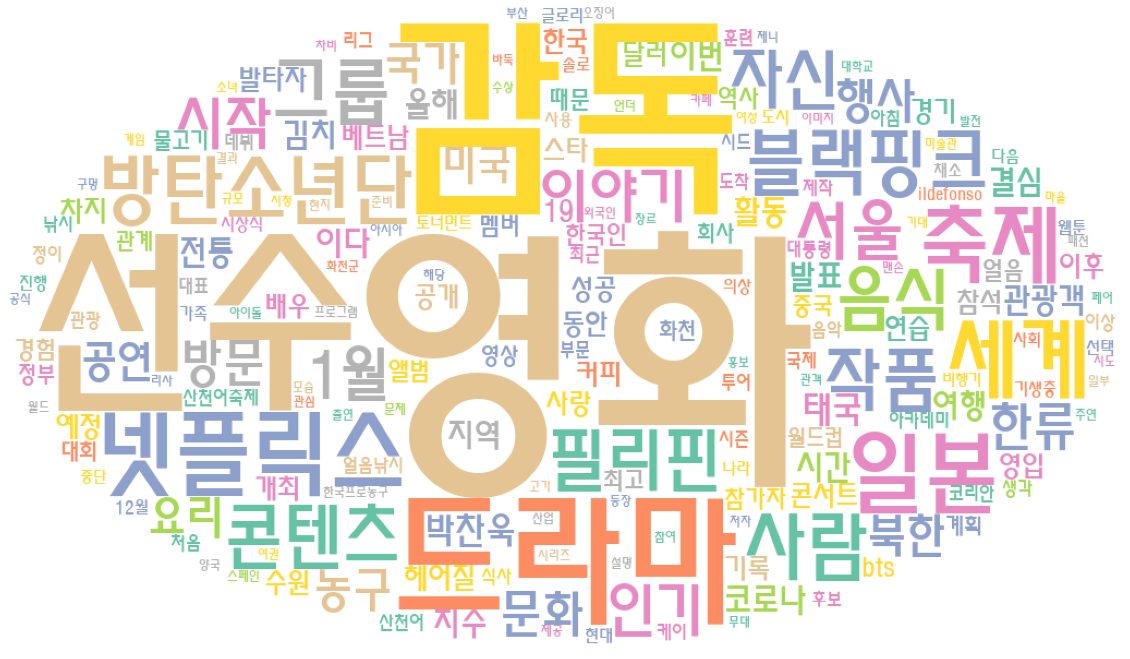

In [14]:
im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, width=1500, height=1200, background_color='white', colormap='Set2', mask=mask_arr, prefer_horizontal=True).fit_words(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
# End of File